In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
! pip install -q gwpy
! pip install -q lalsuite pycbc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 24.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━

In [ ]:
from gwosc.datasets import event_gps
from gwpy.time import to_gps
from gwpy.time import from_gps
from pycbc.waveform import get_td_waveform
from gwpy.timeseries import TimeSeries
from pycbc.types import timeseries
from pycbc.detector import Detector

/usr/local/lib/python3.10/dist-packages/gwpy/time/__init__.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import LIGOTimeGPS


In [ ]:
gps = event_gps('GW200115')
print('Time of the event',gps)

Time of the event 1263097407.7


In [ ]:
print(from_gps(gps))

2020-01-15 04:23:09.700000


In [ ]:
segment = (int(gps)-16, int(gps)+16)
print(segment)

(1263097391, 1263097423)


In [ ]:
duration_of_data=segment[1]-segment[0]
print(duration_of_data)

32


In [ ]:
time_center=gps

In [ ]:
data={} # an empty dictionary
ifos=['L1','H1','V1'] # a list which we use as the dictionary keys
for ifo in ifos:
    data[ifo] = TimeSeries.fetch_open_data(ifo, time_center - 512, time_center + 512)
    data[ifo]=data[ifo].resample(2048)

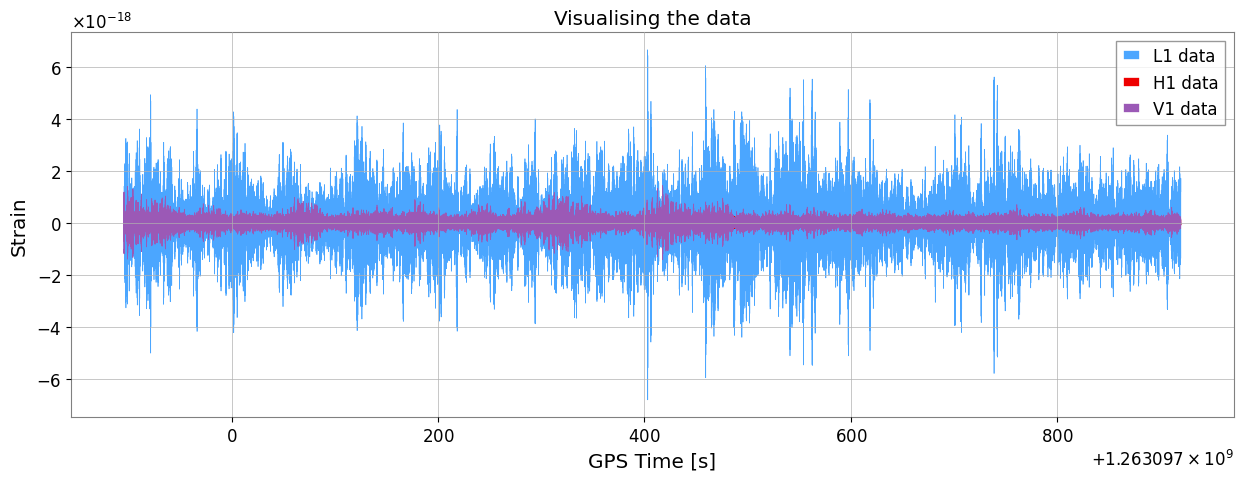

In [ ]:
plt.figure(figsize=(15,5))
colours=['gwpy:ligo-livingston','gwpy:ligo-hanford','gwpy:virgo']


for ifo,colour in zip(ifos,colours):
    plt.plot(data[ifo],label='{} data'.format(ifo),color=colour, linewidth=0.5)
plt.xlabel('GPS Time [s]')
plt.ylabel('Strain')
plt.title('Visualising the data')
plt.legend();

Above, I have downloaded event data that is 1024 seconds long. This gives me a chance to normalise over all the noise including transient noise if any when whitening the data.

Below, I have plotted a Qtransform of the data to visualise where the signal is evident. As we can see it is visible between the range of 30 Hz to 100 Hz. Also, the same signal is evident in all of the other detectors as well, except the Virgo detector which has a lower sensitivity.

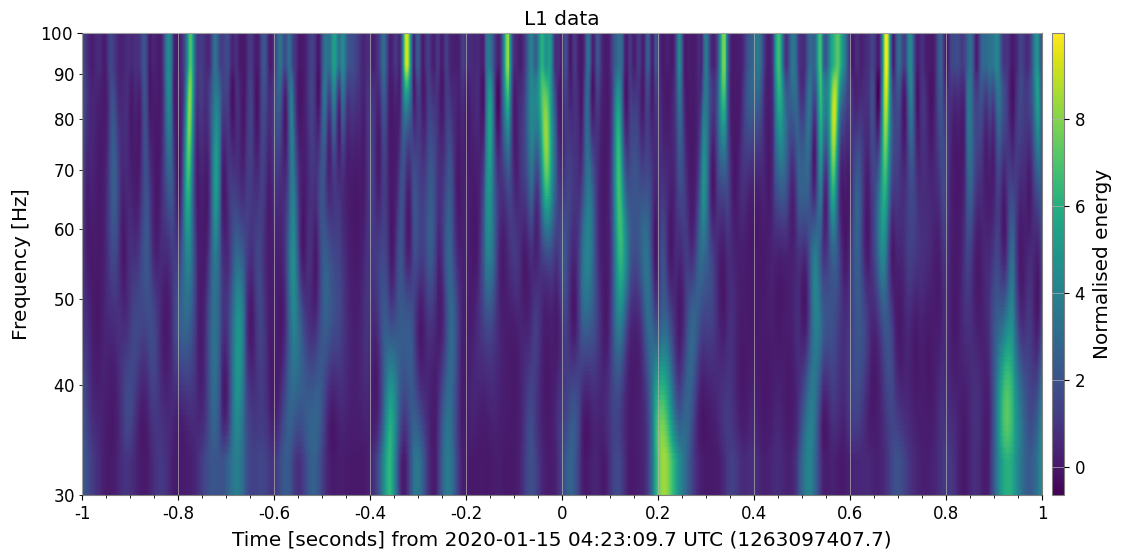

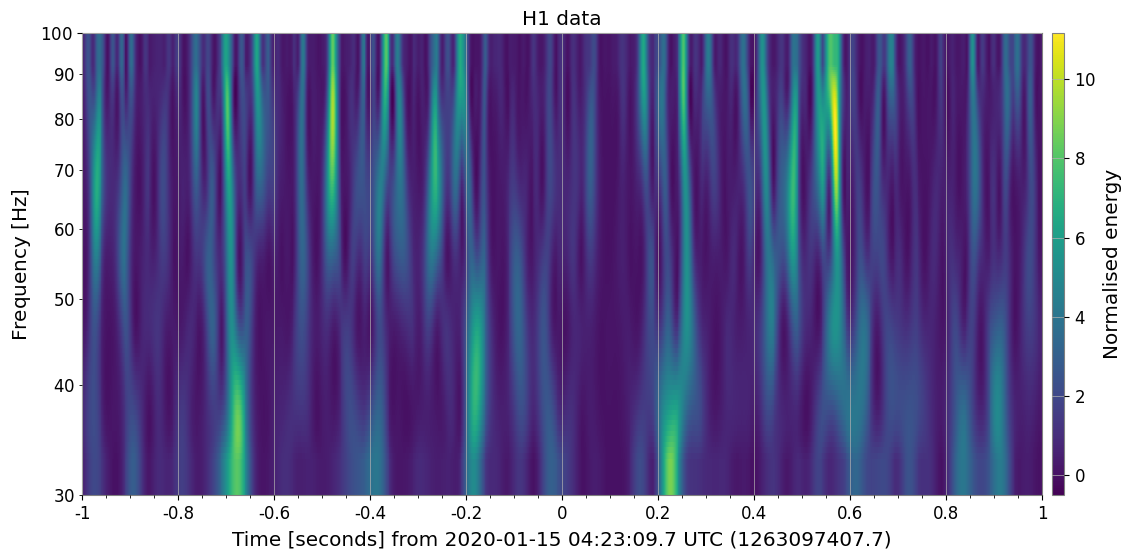

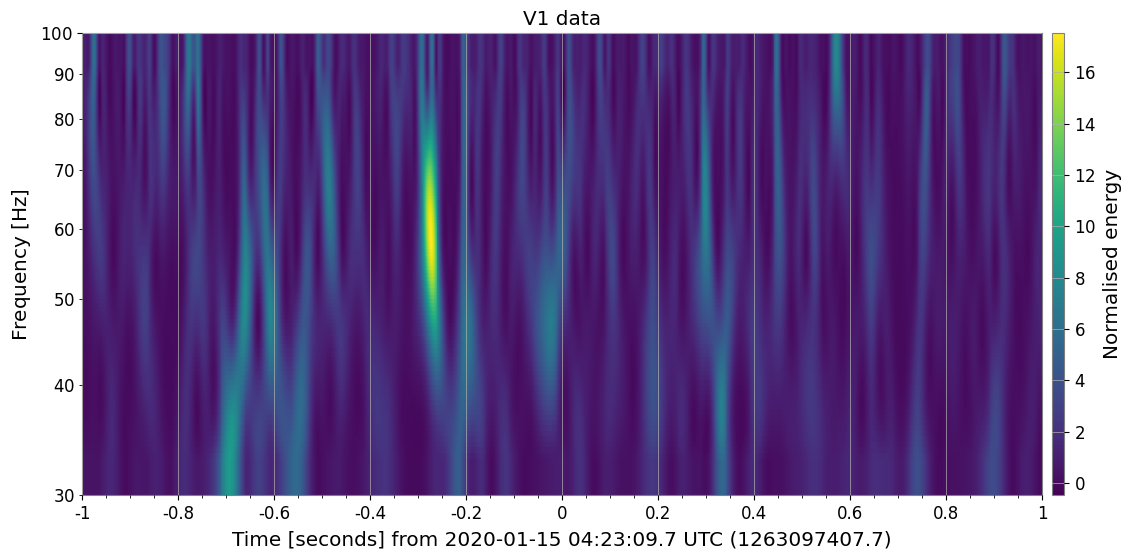

In [ ]:
hq={}
for ifo,colour in zip(ifos,colours):
  hq[ifo] = data[ifo].q_transform(frange=(30, 100),outseg=(time_center - 1, time_center + 1))
  plot=hq[ifo].plot()
  ax = plot.gca()
  ax.set_epoch(gps)
  ax.set_yscale('log')
  ax.colorbar(label="Normalised energy")
  ax.set_title('{} data'.format(ifo))